<a href="https://colab.research.google.com/github/myyourtheir/Data_Science_Course/blob/master/%D0%92%D1%8B%D0%B1%D0%BE%D1%80_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Импорт

In [ ]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.multioutput import MultiOutputRegressor
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold, cross_val_score 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error



from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf


import pickle
sns.set_style('darkgrid')

#Работа с данными

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Course data science/итоговая/Датасет по 3 кейсу/ebw_data.csv')
data.head()

,IW,IF,VW,FP,Depth,Width
0,47,139,4.5,80,1.60,2.54
1,47,139,4.5,80,1.62,2.50
2,47,139,4.5,80,1.68,2.60
3,47,139,4.5,80,1.58,2.52
4,45,140,4.5,80,1.76,2.48


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IW      72 non-null     int64  
 1   IF      72 non-null     int64  
 2   VW      72 non-null     float64
 3   FP      72 non-null     int64  
 4   Depth   72 non-null     float64
 5   Width   72 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 3.5 KB


In [ ]:
data.shape[0]

72

In [ ]:
data.describe()

,IW,IF,VW,FP,Depth,Width
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,45.666667,141.333333,8.638889,78.333333,1.195556,1.970417
std,1.678363,5.145763,2.061078,21.493530,0.225081,0.279040
min,43.000000,131.000000,4.500000,50.000000,0.800000,1.680000
25%,44.000000,139.000000,8.000000,60.000000,1.080000,1.760000
50%,45.500000,141.000000,9.000000,80.000000,1.200000,1.840000
75%,47.000000,146.000000,10.000000,80.000000,1.290000,2.050000
max,49.000000,150.000000,12.000000,125.000000,1.760000,2.600000


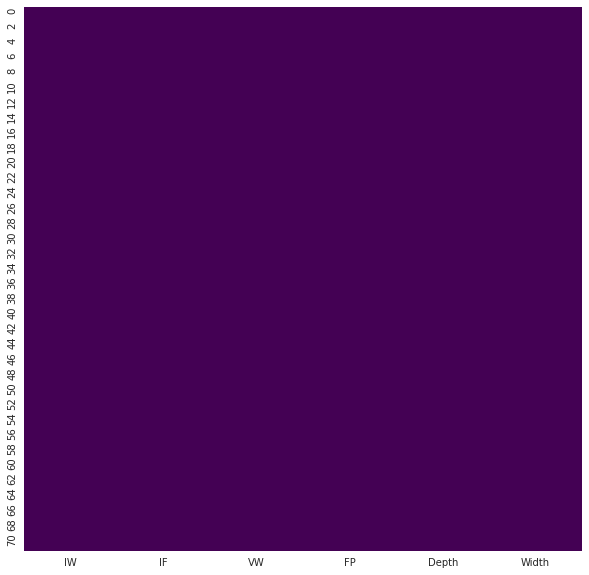

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(data.isna(), cmap = 'viridis', cbar = False)
plt.show()

#Подготовка выборки

In [ ]:
data

,IW,IF,VW,FP,Depth,Width
0,47,139,4.5,80,1.60,2.54
1,47,139,4.5,80,1.62,2.50
2,47,139,4.5,80,1.68,2.60
3,47,139,4.5,80,1.58,2.52
4,45,140,4.5,80,1.76,2.48
...,...,...,...,...,...,...
67,44,146,9.0,60,1.20,1.72
68,45,146,9.0,60,1.36,1.76
69,45,146,9.0,60,1.28,1.76
70,45,146,9.0,60,1.28,1.76


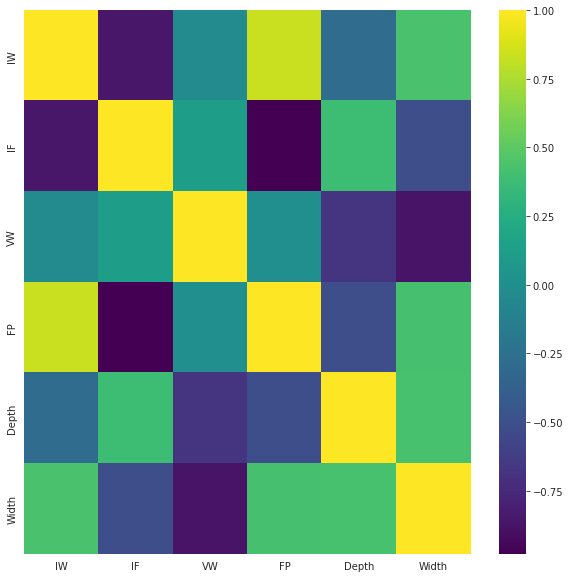

In [ ]:
figure = plt.figure(figsize = (10, 10))
sns.heatmap(data.corr(), cmap = 'viridis')

##Создаем X и y

In [ ]:
y = np.array(data[['Depth','Width']])
X = np.array(data.drop('Depth', axis = 1).drop('Width', axis = 1))
y

array([[1.6 , 2.54],
       [1.62, 2.5 ],
       [1.68, 2.6 ],
       [1.58, 2.52],
       [1.76, 2.48],
       [1.72, 2.48],
       [1.64, 2.52],
       [1.64, 2.56],
       [1.2 , 2.  ],
       [1.2 , 1.96],
       [1.16, 1.96],
       [1.2 , 1.96],
       [0.98, 1.84],
       [1.02, 1.84],
       [1.04, 1.9 ],
       [1.  , 1.86],
       [1.2 , 1.78],
       [1.  , 1.84],
       [1.2 , 1.86],
       [1.16, 1.8 ],
       [1.12, 1.71],
       [1.08, 1.68],
       [1.2 , 1.8 ],
       [1.08, 1.72],
       [0.96, 2.  ],
       [0.96, 1.94],
       [0.92, 1.86],
       [0.94, 1.94],
       [1.36, 2.52],
       [1.36, 2.48],
       [1.4 , 2.48],
       [1.36, 2.48],
       [0.84, 2.16],
       [0.86, 2.08],
       [0.88, 2.  ],
       [0.8 , 2.04],
       [0.84, 2.28],
       [0.84, 2.24],
       [0.8 , 2.24],
       [0.8 , 2.28],
       [1.12, 1.76],
       [1.22, 1.82],
       [1.12, 1.8 ],
       [1.18, 1.78],
       [1.28, 1.8 ],
       [1.36, 1.76],
       [1.36, 1.76],
       [1.24,

##Масштабирование

In [ ]:
scaler = StandardScaler()
Scaler_pkl = scaler.fit(X)
pickle.dump(Scaler_pkl, open('Scaler.pkl', 'wb'))
X_scaled = Scaler_pkl.transform(X)

##Делим на тест и треин

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size = 0.2, 
                                                    shuffle =True, 
                                                    random_state = 42)
y_train

array([[1.2 , 1.8 ],
       [1.2 , 1.76],
       [1.32, 1.84],
       [0.86, 2.08],
       [0.8 , 2.28],
       [1.2 , 1.76],
       [1.2 , 1.78],
       [0.8 , 2.04],
       [1.28, 1.8 ],
       [1.28, 1.76],
       [1.64, 2.56],
       [1.08, 1.82],
       [1.12, 1.8 ],
       [1.4 , 2.48],
       [1.36, 1.76],
       [1.32, 1.76],
       [1.16, 1.8 ],
       [1.2 , 1.88],
       [0.96, 1.94],
       [1.12, 1.76],
       [1.02, 1.84],
       [1.16, 1.76],
       [1.58, 2.52],
       [1.  , 1.84],
       [0.8 , 2.24],
       [1.2 , 2.  ],
       [1.2 , 1.86],
       [1.64, 2.52],
       [0.84, 2.28],
       [1.24, 1.72],
       [1.08, 1.82],
       [1.28, 1.76],
       [1.  , 1.86],
       [0.94, 1.94],
       [1.22, 1.82],
       [0.92, 1.86],
       [1.28, 1.8 ],
       [0.96, 2.  ],
       [1.24, 1.8 ],
       [1.2 , 1.68],
       [1.2 , 1.96],
       [0.84, 2.16],
       [1.36, 1.76],
       [1.24, 1.78],
       [0.84, 2.24],
       [1.36, 2.48],
       [1.18, 1.78],
       [1.2 ,

#ML

##Linear regression

In [ ]:
lr = LinearRegression()
param_grid = {'normalize' : [True, False]}
lr_grid = GridSearchCV(lr, 
                       param_grid = param_grid)
lr_grid.fit(X_train, y_train)
print(f'Лучшие параметры : {lr_grid.best_params_}')
print(f'Лучшая точность : {lr_grid.best_score_}')

Лучшие параметры : {'normalize': True}
Лучшая точность : 0.8565562329962733


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

In [ ]:
#Столбец метрик
metrics =[]
metrics.append('MAPE')
metrics.append('MSE')
metrics.append('MAE')

In [ ]:
lr_metrics = []
y_pred_lr = lr_grid.predict(X_test).round(2)
lr_metrics.append(mean_absolute_percentage_error(y_test, y_pred_lr, multioutput='raw_values').round(2))
lr_metrics.append(mean_squared_error(y_test, y_pred_lr,  multioutput='raw_values').round(2))
lr_metrics.append(mean_absolute_error(y_test, y_pred_lr, multioutput='raw_values').round(2))
lr_metrics

[array([0.08, 0.02]), array([0.02, 0.  ]), array([0.11, 0.04])]

In [ ]:
Compr = pd.DataFrame({'Metrics': metrics, 'lr': lr_metrics})
Compr.reset_index()

,index,Metrics,lr
0,0,MAPE,"[0.08, 0.02]"
1,1,MSE,"[0.02, 0.0]"
2,2,MAE,"[0.11, 0.04]"


##Stacking

In [ ]:
#список "слабых" алгоритмов
stack_0 = list()
stack_0.append(('kNNr',  KNeighborsRegressor()))
stack_0.append(('SVR', SVR()))
stack_0.append(('gbr' , GradientBoostingRegressor()))
#meta model 
stack_1 = LinearRegression()
#Ансамбль
stack_model = StackingRegressor(estimators=stack_0, final_estimator=stack_1)
wrapped_stack_model = MultiOutputRegressor(stack_model)
wrapped_stack_model.fit(X_train, y_train)

MultiOutputRegressor(estimator=StackingRegressor(estimators=[('kNNr',
                                                              KNeighborsRegressor()),
                                                             ('SVR', SVR()),
                                                             ('gbr',
                                                              GradientBoostingRegressor())],
                                                 final_estimator=LinearRegression()))

In [ ]:
y_pred_stacked = wrapped_stack_model.predict(X_test).round(2)
Stack_metrics = []
Stack_metrics.append(mean_absolute_percentage_error(y_test,y_pred_stacked, multioutput='raw_values').round(2))
Stack_metrics.append(mean_squared_error(y_test, y_pred_stacked,  multioutput='raw_values').round(2))
Stack_metrics.append(mean_absolute_error(y_test, y_pred_stacked, multioutput='raw_values').round(2))
Stack_metrics

[array([0.06, 0.01]), array([0.01, 0.  ]), array([0.07, 0.03])]

In [ ]:
Compr['Stacking'] = Stack_metrics
Compr

,Metrics,lr,Stacking
0,MAPE,"[0.08, 0.02]","[0.06, 0.01]"
1,MSE,"[0.02, 0.0]","[0.01, 0.0]"
2,MAE,"[0.11, 0.04]","[0.07, 0.03]"


##ИНС

Epoch 1/500
2/2 - 1s - loss: 1.3675 - mape: 84.8620 - mse: 2.1742 - mae: 1.3675 - val_loss: 1.4463 - val_mape: 82.8648 - val_mse: 2.4650 - val_mae: 1.4463 - 954ms/epoch - 477ms/step
Epoch 2/500
2/2 - 0s - loss: 1.2575 - mape: 75.9502 - mse: 1.9491 - mae: 1.2575 - val_loss: 1.3616 - val_mape: 76.7941 - val_mse: 2.2753 - val_mae: 1.3616 - 24ms/epoch - 12ms/step
Epoch 3/500
2/2 - 0s - loss: 1.1613 - mape: 68.6778 - mse: 1.7506 - mae: 1.1613 - val_loss: 1.2861 - val_mape: 71.7245 - val_mse: 2.1011 - val_mae: 1.2861 - 23ms/epoch - 12ms/step
Epoch 4/500
2/2 - 0s - loss: 1.0952 - mape: 64.6631 - mse: 1.5875 - mae: 1.0952 - val_loss: 1.2311 - val_mape: 68.6733 - val_mse: 1.9481 - val_mae: 1.2311 - 23ms/epoch - 11ms/step
Epoch 5/500
2/2 - 0s - loss: 1.0380 - mape: 61.3964 - mse: 1.4516 - mae: 1.0380 - val_loss: 1.1735 - val_mape: 65.3976 - val_mse: 1.8063 - val_mae: 1.1735 - 31ms/epoch - 15ms/step
Epoch 6/500
2/2 - 0s - loss: 0.9799 - mape: 57.9575 - mse: 1.3291 - mae: 0.9799 - val_loss: 1.1137

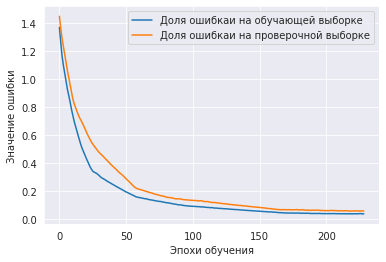

In [ ]:
model = Sequential()
# model.add(BatchNormalization())
model.add(tf.keras.Input(X_train.shape[1],))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(y_train.shape[1], activation='selu'))  


model.compile(loss = 'mae', 
              optimizer = 'adamax',
               metrics = [ 'mape', 'mse', 'mae'])

es = EarlyStopping(monitor = 'val_loss',
                   mode = 'min',
                   patience = 10,
                   verbose = 1)

history = model.fit(X_train, y_train,
          batch_size = 32, #сколько объектов пожается за разх в нейронку
          epochs = 500,  #сколько циклов по выборке пройдет нейронка
          validation_data = (X_test, y_test),
          verbose = 2,
          callbacks = [es] )#визуализация процесса обучения

plt.plot(history.history['loss'],
         label = 'Доля ошибкаи на обучающей выборке')
plt.plot(history.history['val_loss'],
         label = 'Доля ошибкаи на проверочной выборке')
plt.xlabel('Эпохи обучения')
plt.ylabel('Значение ошибки')
plt.legend()
plt.show()

In [ ]:
y_pred_n = model.predict(X_test).round(2)
N_metrics = []
N_metrics.append(mean_absolute_percentage_error(y_test,y_pred_n, multioutput='raw_values').round(2))
N_metrics.append(mean_squared_error(y_test, y_pred_n,  multioutput='raw_values').round(2))
N_metrics.append(mean_absolute_error(y_test, y_pred_n, multioutput='raw_values').round(2))
N_metrics

1/1 [==============================] - 0s 82ms/step


[array([0.06, 0.02]), array([0.01, 0.  ]), array([0.07, 0.05])]

In [ ]:
Compr['ANN'] = N_metrics

#Сравнительная таблица

In [ ]:
Compr

,Metrics,lr,Stacking,ANN
0,MAPE,"[0.08, 0.02]","[0.06, 0.01]","[0.06, 0.02]"
1,MSE,"[0.02, 0.0]","[0.01, 0.0]","[0.01, 0.0]"
2,MAE,"[0.11, 0.04]","[0.07, 0.03]","[0.07, 0.05]"


#Анализ

Как видно из таблицы выше, несмотря на то, что в ИНН было использовано много эпох обучения и немало слоев, ансамблевый метод показал себя лучше. В приложении будем использовать его.

#Сохранение модели Stacking

In [ ]:
pickle.dump(wrapped_stack_model, open('model.pkl', 'wb'))

In [ ]:
model_load = pickle.load(open('/content/model.pkl', 'rb'))

In [ ]:
model_load.predict(X_test)

array([[1.6195365 , 2.53741934],
       [1.20382756, 1.77316464],
       [1.09782673, 1.81068083],
       [1.54334722, 2.5196135 ],
       [1.54334722, 2.5196135 ],
       [1.22609265, 1.79335081],
       [1.22068122, 1.95452507],
       [0.83839135, 2.07482909],
       [1.04366736, 1.85808416],
       [1.13104334, 1.804728  ],
       [1.29400427, 1.77143306],
       [1.54334722, 2.5196135 ],
       [1.22068122, 1.95452507],
       [1.29400427, 1.77143306],
       [1.6195365 , 2.53741934]])

In [ ]:
wrapped_stack_model.predict(X_test)

array([[1.6195365 , 2.53741934],
       [1.20382756, 1.77316464],
       [1.09782673, 1.81068083],
       [1.54334722, 2.5196135 ],
       [1.54334722, 2.5196135 ],
       [1.22609265, 1.79335081],
       [1.22068122, 1.95452507],
       [0.83839135, 2.07482909],
       [1.04366736, 1.85808416],
       [1.13104334, 1.804728  ],
       [1.29400427, 1.77143306],
       [1.54334722, 2.5196135 ],
       [1.22068122, 1.95452507],
       [1.29400427, 1.77143306],
       [1.6195365 , 2.53741934]])

In [ ]:
#Проверка сохраненной модели скелера
with open('/content/Scaler.pkl', 'rb') as sc_f:
  sc = pickle.load(sc_f)
  y = sc.transform(X)
y

array([[ 0.8       , -0.45662965, -2.02221044,  0.07808688],
       [ 0.8       , -0.45662965, -2.02221044,  0.07808688],
       [ 0.8       , -0.45662965, -2.02221044,  0.07808688],
       [ 0.8       , -0.45662965, -2.02221044,  0.07808688],
       [-0.4       , -0.26093123, -2.02221044,  0.07808688],
       [-0.4       , -0.26093123, -2.02221044,  0.07808688],
       [-0.4       , -0.26093123, -2.02221044,  0.07808688],
       [-0.4       , -0.26093123, -2.02221044,  0.07808688],
       [-0.4       , -0.26093123, -0.31215329,  0.07808688],
       [-0.4       , -0.26093123, -0.31215329,  0.07808688],
       [-0.4       , -0.26093123, -0.31215329,  0.07808688],
       [-0.4       , -0.26093123, -0.31215329,  0.07808688],
       [-0.4       , -0.06523281,  0.66502222,  0.07808688],
       [-0.4       , -0.06523281,  0.66502222,  0.07808688],
       [-0.4       , -0.06523281,  0.66502222,  0.07808688],
       [-0.4       , -0.06523281,  0.66502222,  0.07808688],
       [ 0.2       , -0.

In [ ]:
X_scaled

array([[ 0.8       , -0.45662965, -2.02221044,  0.07808688],
       [ 0.8       , -0.45662965, -2.02221044,  0.07808688],
       [ 0.8       , -0.45662965, -2.02221044,  0.07808688],
       [ 0.8       , -0.45662965, -2.02221044,  0.07808688],
       [-0.4       , -0.26093123, -2.02221044,  0.07808688],
       [-0.4       , -0.26093123, -2.02221044,  0.07808688],
       [-0.4       , -0.26093123, -2.02221044,  0.07808688],
       [-0.4       , -0.26093123, -2.02221044,  0.07808688],
       [-0.4       , -0.26093123, -0.31215329,  0.07808688],
       [-0.4       , -0.26093123, -0.31215329,  0.07808688],
       [-0.4       , -0.26093123, -0.31215329,  0.07808688],
       [-0.4       , -0.26093123, -0.31215329,  0.07808688],
       [-0.4       , -0.06523281,  0.66502222,  0.07808688],
       [-0.4       , -0.06523281,  0.66502222,  0.07808688],
       [-0.4       , -0.06523281,  0.66502222,  0.07808688],
       [-0.4       , -0.06523281,  0.66502222,  0.07808688],
       [ 0.2       , -0.